In [15]:
# Importamos las librerias necesarias para realizar el ejercicio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor

In [16]:
# Definimos el nombre de las columnas, y leemos los datos
col=["mpg","cilindros","desplazamiento","caballos_de_fuerza","peso","aceleración","año","origen","modelo"]
df = pd.read_csv("auto-mpg.data",sep = r"\s+", names = col)
df.set_index("modelo", inplace=True)
np.random.seed(2408)

In [17]:
# Vemos que los datos se encuentran de manera correcta
df.head()

,mpg,cilindros,desplazamiento,caballos_de_fuerza,peso,aceleración,año,origen
modelo,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [18]:
# Comprobamos sobre los datos varias medidas de tendencia
df.describe()

,mpg,cilindros,desplazamiento,peso,aceleración,año,origen
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [19]:
# Comprobamos los tipos de las columnas
df.dtypes

mpg                   float64
cilindros               int64
desplazamiento        float64
caballos_de_fuerza     object
peso                  float64
aceleración           float64
año                     int64
origen                  int64
dtype: object

In [20]:
# Al comprobar que el tipo de la columna "Caballos de fuerza" no es 
# un entero, procedemos a convertirlos a este tipo
df= df[df["caballos_de_fuerza"]!="?"]
print(df[df["caballos_de_fuerza"]=="?"].shape)
df["caballos_de_fuerza"] = pd.to_numeric(df["caballos_de_fuerza"])

(0, 8)


In [21]:
# Como podemos ver le cambiamos el tipo
df.dtypes

mpg                   float64
cilindros               int64
desplazamiento        float64
caballos_de_fuerza    float64
peso                  float64
aceleración           float64
año                     int64
origen                  int64
dtype: object

In [22]:
# Y ahora las medidas tambien aploca para esa columna
df.describe()

,mpg,cilindros,desplazamiento,caballos_de_fuerza,peso,aceleración,año,origen
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


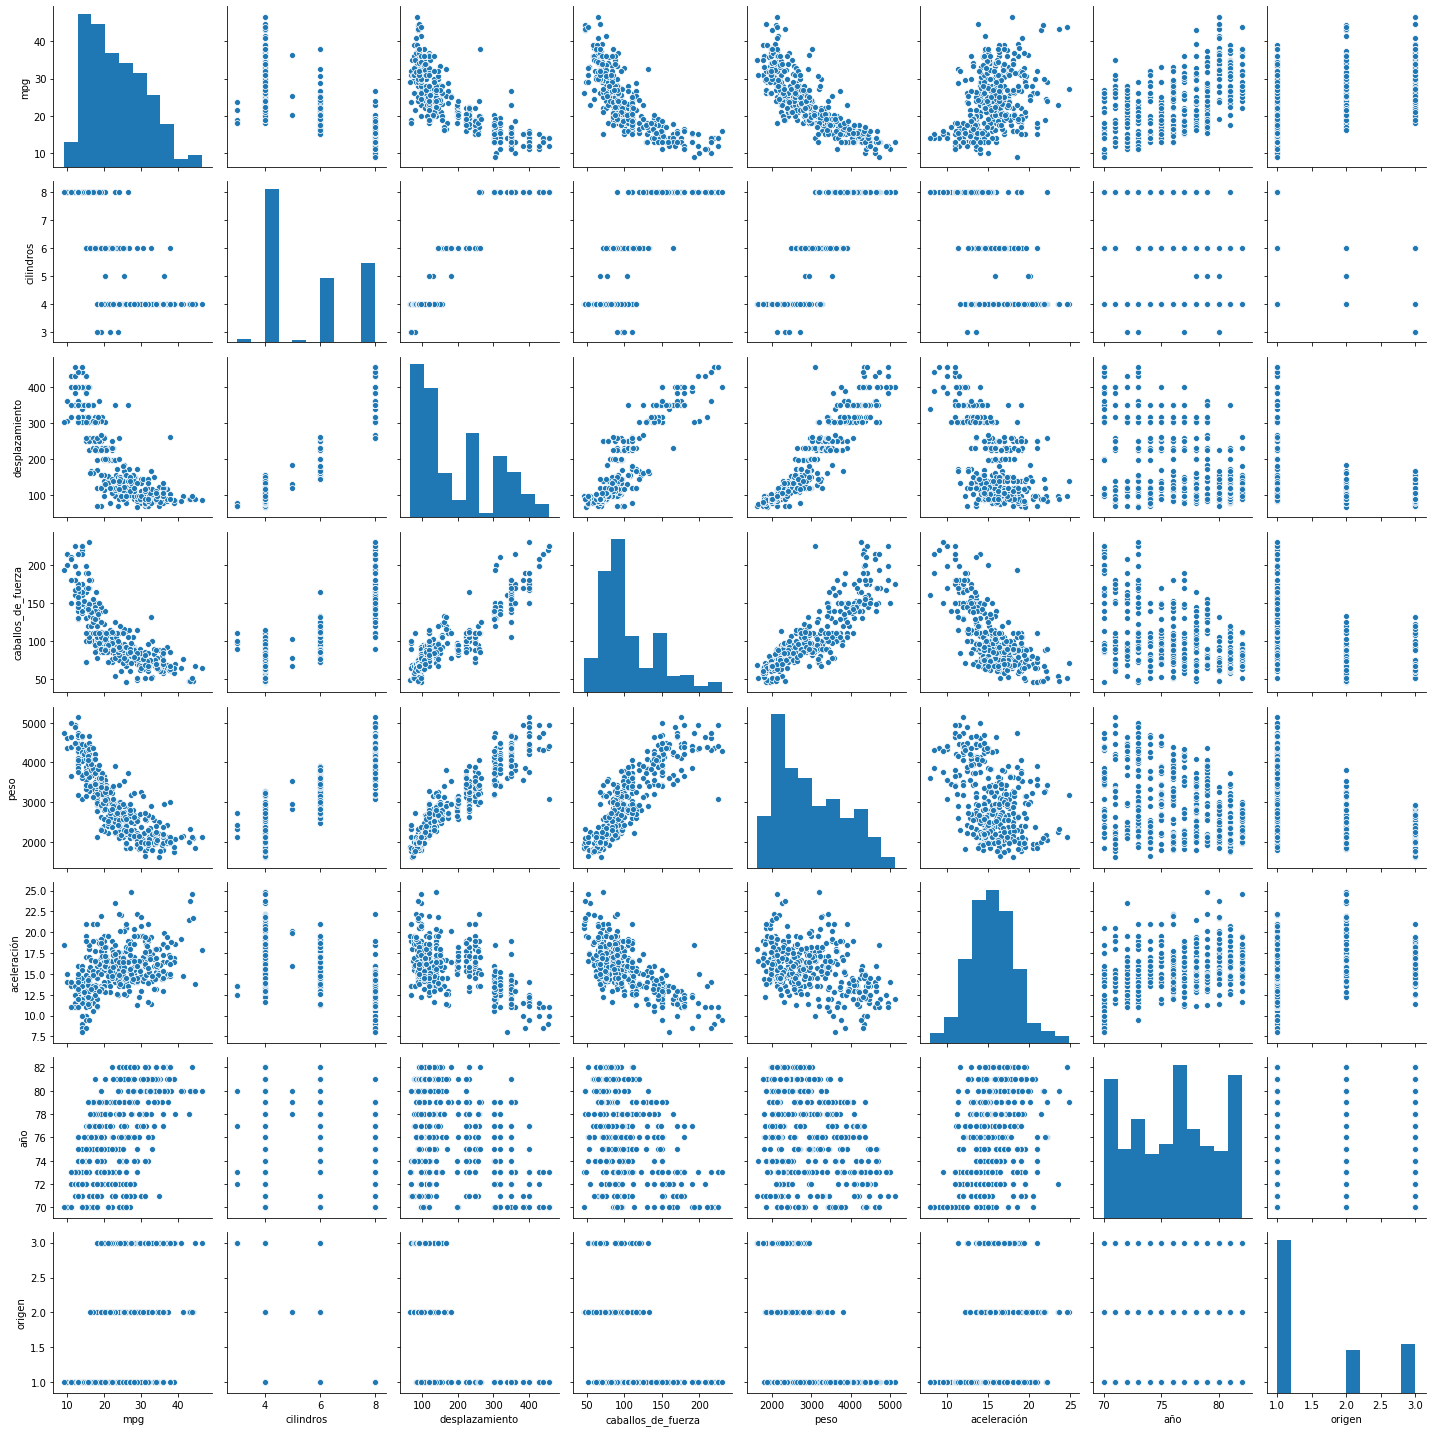

In [23]:
# Aqui  podemos ver varias graficas
sns.pairplot(df, height = 2.5)
plt.tight_layout()
plt.show()

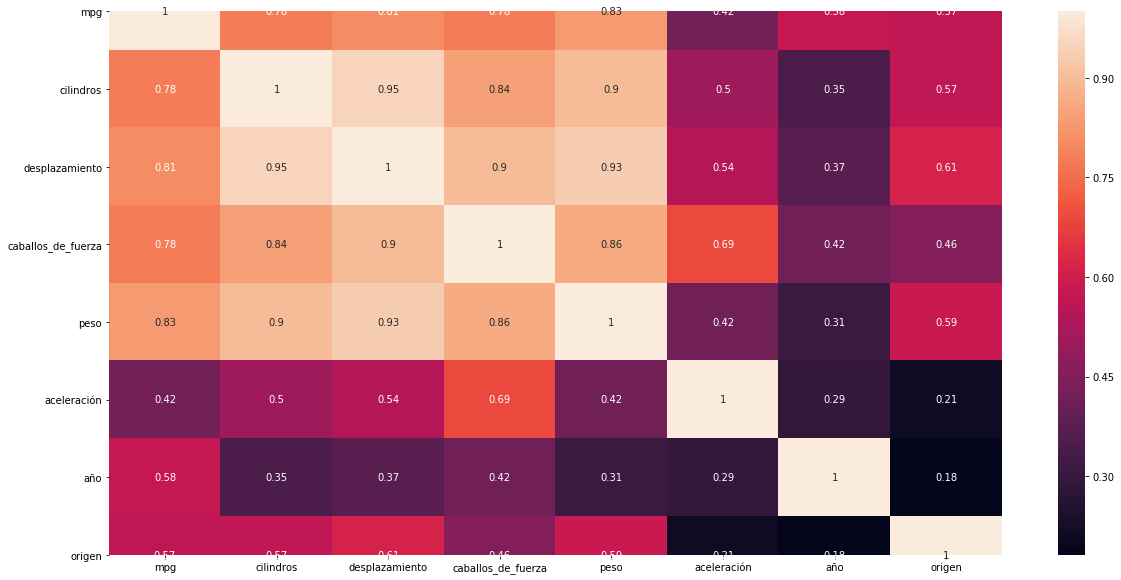

In [24]:
# Aqui comprobamos la correlación de las columnas y notamos que las ultimas 
# tres varibles son menores que 0.5
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),
           annot = True,
           annot_kws = {'size': 10})
plt.show()

In [25]:
# Al probar eliminar cada uno de esas variables nos dimos cuenta
# que la mejor regresion se obtendra al eliminar la aceleración
try:
    del df["aceleracion"]
except:
    print()

IndexError: index 7 is out of bounds for axis 0 with size 7

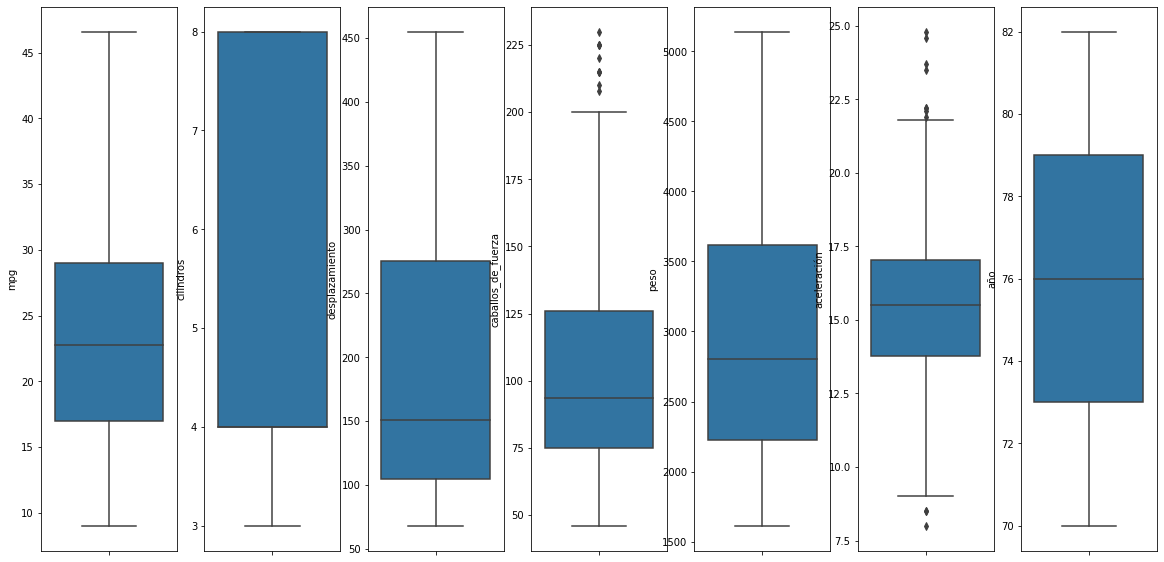

In [26]:
# Con esta grafica podemos ver que tan cerca estan los valores de las 
# variables a su respectiva media
fig, axs = plt.subplots(ncols = 7, nrows = 1, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y = k, data = df, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5)

In [27]:
# Aqui separamos las columnas para realizar la respectiva prediccion
X = df[df.columns[1:]]
Y = df[df.columns[0]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

[]

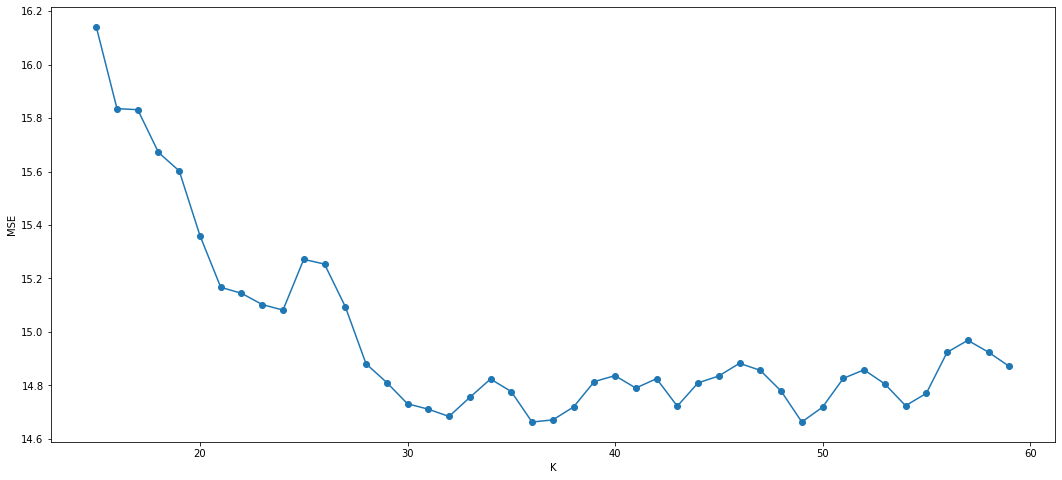

In [28]:
# Comprobamos varios k, y podemos ver cual seria mejor a la hora de intentar
# predecir.
K = range(15,60)
mse = []
for i in K:
    knnreg = KNeighborsRegressor(n_neighbors = i) #Instanciar modelos
    knnreg.fit(x_train, y_train) #Entrenar
    pred = knnreg.predict(x_test) #Predecir
    ecm = mean_squared_error(y_test,pred)
    mse.append(ecm)
plt.figure(figsize=(18,8))
plt.plot(K,mse, marker = 'o')
plt.xlabel('K')
plt.ylabel('MSE')
plt.plot()

In [29]:
# vemos los valores de la regresión
models_metric= pd.DataFrame({})

model_names = ["LinReg","DTreeReg","SVR", "KNReg"]
models = [LinearRegression(),DecisionTreeRegressor(),SVR(kernel = 'rbf'), KNeighborsRegressor(n_neighbors = 33)]
mse_per_model = []
for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse_per_model.append(mean_squared_error(y_test,y_pred)**0.5)
models_metric["x"] = model_names
models_metric["y"] = mse_per_model
print(mse_per_model)

[3.1323055938228483, 4.11181637458497, 7.926047898764097, 3.8412016403146265]


C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


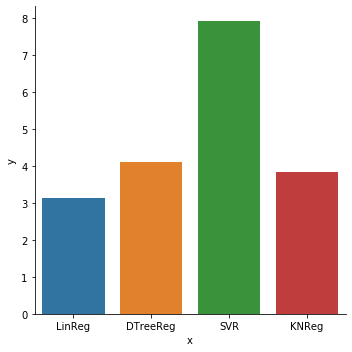

In [30]:
# Aqui graficamos los respectivos valores de la regresión
sns.catplot(x = "x", y = "y", data = models_metric,kind = "bar");

In [31]:
# Aqui esta el modelo que escogimos
model =LinearRegression()
model.fit(x_train,y_train)
ypredmod=model.predict(x_test)